In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fem.fem1d import *

In [2]:
elems = elem_indices(3, 3)
print(elems)

[[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


In [3]:
elems[0]

array([0, 1, 2, 3])

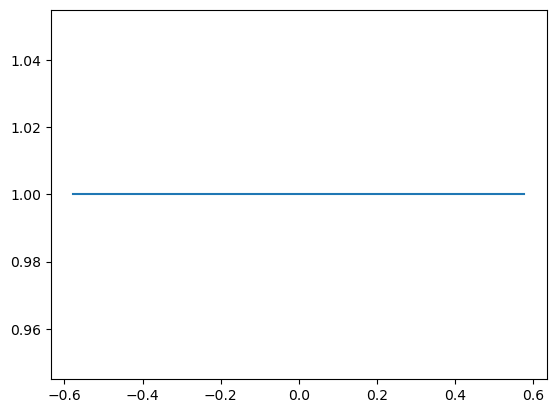

[-0.57735027  0.57735027]


In [4]:
nodes, weights = np.polynomial.legendre.leggauss(2)
plt.plot(nodes, weights)
plt.show()
print(nodes)

In [5]:
p1 = np.polynomial.Polynomial((0, -0.5, 0.5))
p1

Polynomial([ 0. , -0.5,  0.5], domain=[-1,  1], window=[-1,  1], symbol='x')

In [6]:
p1(0)

0.0

In [7]:
p1.domain = np.array([0, 5])
p1(2.5)

0.0

In [8]:
b = local_basis(2)
b

[Polynomial([ 0. , -0.5,  0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 Polynomial([ 1.,  0., -1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 Polynomial([0. , 0.5, 0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')]

In [9]:
leggauss_nodes, leggauss_weights = np.polynomial.legendre.leggauss(2)
np.array([leggauss_weights * p(leggauss_nodes) for p in b])

array([[ 0.4553418 , -0.12200847],
       [ 0.66666667,  0.66666667],
       [-0.12200847,  0.4553418 ]])

In [10]:
int_factors = np.array([leggauss_weights * p(leggauss_nodes) for p in b])
int_factors

array([[ 0.4553418 , -0.12200847],
       [ 0.66666667,  0.66666667],
       [-0.12200847,  0.4553418 ]])

In [11]:
n_elem = 10
polydeg = 2

x_start = 0
x_end = 1
elems = elem_indices(n_elem, polydeg)
print(elems)

nodes = n_elem * polydeg + 1
x_coords = np.linspace(x_start, x_end, nodes)

end_points = np.append(x_coords[elems[:, 0]], x_coords[-1])
end_points

[[ 0  1  2]
 [ 2  3  4]
 [ 4  5  6]
 [ 6  7  8]
 [ 8  9 10]
 [10 11 12]
 [12 13 14]
 [14 15 16]
 [16 17 18]
 [18 19 20]]


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [12]:
transformed_nodes = (np.array((0.5*np.array([np.diff(end_points)])).T @ [leggauss_nodes + 1]) + end_points[:-1][:, np.newaxis])
transformed_nodes

array([[0.02113249, 0.07886751],
       [0.12113249, 0.17886751],
       [0.22113249, 0.27886751],
       [0.32113249, 0.37886751],
       [0.42113249, 0.47886751],
       [0.52113249, 0.57886751],
       [0.62113249, 0.67886751],
       [0.72113249, 0.77886751],
       [0.82113249, 0.87886751],
       [0.92113249, 0.97886751]])

In [13]:
source_component = np.diff(end_points)[:, np.newaxis] * TestParams.source(transformed_nodes)
source_component

array([[ 21.67442931,  47.71538468],
       [ 22.23556487, -34.41836953],
       [-47.81390353,  -7.25416464],
       [ 33.97304983,  42.94615152],
       [  7.8761882 , -43.23206437],
       [-43.23206437,   7.8761882 ],
       [ 42.94615152,  33.97304983],
       [ -7.25416464, -47.81390353],
       [-34.41836953,  22.23556487],
       [ 47.71538468,  21.67442931]])

In [14]:
print(source_component @ int_factors.T)

[[  4.0475927   46.259876    19.08234529]
 [ 14.3241147   -8.12186977 -18.38504958]
 [-20.88659945 -36.71204545   2.53057672]
 [ 10.22955555  51.27946757  15.41017823]
 [  8.86103566 -23.57058411 -20.64632772]
 [-20.64632772 -23.57058411   8.86103566]
 [ 15.41017823  51.27946757  10.22955555]
 [  2.53057672 -36.71204545 -20.88659945]
 [-18.38504958  -8.12186977  14.3241147 ]
 [ 19.08234529  46.259876     4.0475927 ]]


In [15]:
source_component = prep_gauss_quadrature(TestParams.source, end_points, leggauss_nodes)
integral_matrix = source_component @ int_factors.T
print(source_component)

print(accumulate_by_index(integral_matrix, elems))

[[ 10.83721466  23.85769234]
 [ 11.11778244 -17.20918476]
 [-23.90695177  -3.62708232]
 [ 16.98652491  21.47307576]
 [  3.9380941  -21.61603218]
 [-21.61603218   3.9380941 ]
 [ 21.47307576  16.98652491]
 [ -3.62708232 -23.90695177]
 [-17.20918476  11.11778244]
 [ 23.85769234  10.83721466]]
[  2.02379635  23.129938    16.70323     -4.06093489 -19.63582451
 -18.35602273   6.38006614  25.63973378  12.13560695 -11.78529206
 -20.64632772 -11.78529206  12.13560695  25.63973378   6.38006614
 -18.35602273 -19.63582451  -4.06093489  16.70323     23.129938
   2.02379635]


In [16]:
print(elems)

[[ 0  1  2]
 [ 2  3  4]
 [ 4  5  6]
 [ 6  7  8]
 [ 8  9 10]
 [10 11 12]
 [12 13 14]
 [14 15 16]
 [16 17 18]
 [18 19 20]]


In [17]:
# Your example A:
A = np.array([
    [ 0.06684247,   5.17906988,   2.52269246],
    [ 2.6012705 ,  11.26743166,   3.03244533],
    [ 2.99113441,   8.06659045,   1.04216082],
    [ 0.91501888,  -1.78458586,  -1.80731181],
    [-1.9154652 , -10.16449695,  -3.16678327],
    [-6.33356654, -20.32899389,  -3.8309304 ],
    [-3.61462362,  -3.56917172,   1.83003776],
    [ 2.08432164,  16.1331809 ,   5.98226881],
    [ 6.06489065,  22.53486333,   5.20254101],
    [ 5.04538493,  10.35813975,   0.13368495]
])

# And the indices mapping array you provided:
indices = np.array([
    [ 0,  1,  2],
    [ 2,  3,  4],
    [ 4,  5,  6],
    [ 6,  7,  8],
    [ 8,  9, 10],
    [10, 11, 12],
    [12, 13, 14],
    [14, 15, 16],
    [16, 17, 18],
    [18, 19, 20]
])

# Flatten indices and data arrays:
flat_indices = indices.ravel()
print(flat_indices)
flat_values = A.ravel()
print(flat_values)
print('___')
print()

# Compute the accumulation using np.bincount:
result_length = flat_indices.max() + 1
result = np.bincount(flat_indices, weights=flat_values, minlength=result_length)

print(result)

[ 0  1  2  2  3  4  4  5  6  6  7  8  8  9 10 10 11 12 12 13 14 14 15 16
 16 17 18 18 19 20]
[  0.06684247   5.17906988   2.52269246   2.6012705   11.26743166
   3.03244533   2.99113441   8.06659045   1.04216082   0.91501888
  -1.78458586  -1.80731181  -1.9154652  -10.16449695  -3.16678327
  -6.33356654 -20.32899389  -3.8309304   -3.61462362  -3.56917172
   1.83003776   2.08432164  16.1331809    5.98226881   6.06489065
  22.53486333   5.20254101   5.04538493  10.35813975   0.13368495]
___

[  0.06684247   5.17906988   5.12396296  11.26743166   6.02357974
   8.06659045   1.9571797   -1.78458586  -3.72277701 -10.16449695
  -9.50034981 -20.32899389  -7.44555402  -3.56917172   3.9143594
  16.1331809   12.04715946  22.53486333  10.24792594  10.35813975
   0.13368495]


In [18]:
p0, p1 = local_basis(1)
print(p1(0))
print(p1.deriv()(0))
print('\n')
p1.domain = np.array([-1, 1])
print(p1(0))
print(p1.deriv()(0))

0.5
0.5


0.5
0.5


In [19]:

vec = np.array([0, 1, 2])

# Generate all unique pairs (i,j) with i <= j
i_indices, j_indices = np.triu_indices(len(vec))

print(np.triu_indices(len(vec)))

# Stack pairs into a matrix
pairs = np.column_stack((vec[i_indices], vec[j_indices]))

print(pairs)

(array([0, 0, 0, 1, 1, 2]), array([0, 1, 2, 1, 2, 2]))
[[0 0]
 [0 1]
 [0 2]
 [1 1]
 [1 2]
 [2 2]]


In [20]:
basis = local_basis(2)
basis_derivs = [p.deriv() for p in basis] 
basis_deriv_vals = np.array([p(leggauss_nodes) for p in basis_derivs])

In [21]:
np.prod(basis_deriv_vals[pairs], axis=1)

array([[ 1.1606836 ,  0.00598306],
       [-1.24401694, -0.0893164 ],
       [ 0.08333333,  0.08333333],
       [ 1.33333333,  1.33333333],
       [-0.0893164 , -1.24401694],
       [ 0.00598306,  1.1606836 ]])

In [22]:
basis1 = local_basis(1)
basis1_derivs = [p.deriv() for p in basis1]
basis1_deriv_vals = np.array([p(leggauss_nodes) for p in basis1_derivs])

In [23]:
vec = np.array([0, 1])

# Generate all unique pairs (i,j) with i <= j
i_indices, j_indices = np.triu_indices(len(vec))

print(np.triu_indices(len(vec)))

# Stack pairs into a matrix
pairs = np.column_stack((vec[i_indices], vec[j_indices]))

print(pairs)

np.prod(basis1_deriv_vals[pairs], axis=1)

(array([0, 0, 1]), array([0, 1, 1]))
[[0 0]
 [0 1]
 [1 1]]


array([[ 0.25,  0.25],
       [-0.25, -0.25],
       [ 0.25,  0.25]])

In [24]:
D = lambda x: np.ones(x.shape)

In [25]:
end_points

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [26]:
help(prep_gauss_quadrature)
prep_gauss_quadrature(D, end_points, leggauss_nodes) @ np.prod(basis_deriv_vals[pairs], axis=1).T

Help on function prep_gauss_quadrature in module fem.fem1d:

prep_gauss_quadrature(f, dom, nodes)
    Preparing a function f for num integration via gaussian quadrature.
    
    :param f: integrand
    :param dom: endpoints of domains of integration
    :param nodes: sampling points in interval [-1,1]
    :return: array of points where ith row is
            |T_i| * [f(T_i y_0)  f(T_i y_1),  ...,  f(T_i y_n-1)],
            where
            - |T_i| = (dom_i - dom_i-1) / 2 is the Jacobian of the transform and
            - f(T_i y_j) is the image of the jth node under the
                affine transformation T_i: [-1,1] -> dom_i



array([[ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333],
       [ 0.05833333, -0.06666667,  0.13333333]])

In [27]:
def build_stiffness_matrix_v3(x_coords, d, elems, diffusion, basis):
    n_nodes = len(x_coords)
    stiff_mat = np.zeros((n_nodes, n_nodes))

    n_leggauss = d
    gauss_nodes, gauss_weights = np.polynomial.legendre.leggauss(n_leggauss)

    for p in basis:
        p.domain = np.array([-1, 1])

    basis_deriv_vals = np.array([
        p.deriv()(gauss_nodes) for p in basis
    ])

    for elem in elems:
        elem_x = x_coords[elem]
        x_start, x_end = elem_x[0], elem_x[-1]

        J = (x_end - x_start) / 2
        inv_J = 1 / J

        phys_pts = J * gauss_nodes + (x_start + x_end) / 2
        diffusion_vals = diffusion(phys_pts) * gauss_weights * inv_J

        basis_phys_derivs = basis_deriv_vals * inv_J

        # print(basis_phys_derivs)
        # print(basis_phys_derivs.shape)
        # print()
        # print(np.diag(diffusion_vals))
        # print(np.diag(diffusion_vals).shape)
        
        local_stiffness = basis_phys_derivs @ np.diag(diffusion_vals) @ basis_phys_derivs.T * J

        stiff_mat[np.ix_(elem, elem)] += local_stiffness

    return stiff_mat


In [28]:
import pprint
np.set_printoptions(precision=3, suppress=True, linewidth=1000)

build_stiffness_matrix_v3(x_coords, 2, elems, D, basis)

# elem = elems[0]
# print(np.ix_(elem, elem))

array([[ 466.667, -533.333,   66.667,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ],
       [-533.333, 1066.667, -533.333,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ],
       [  66.667, -533.333,  933.333, -533.333,   66.667,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   , -533.333, 1066.667, -533.333,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,   66.667, -533.333,  933.333, -533.333,   66.667,    0.   ,    0.   ,    0.   ,    0.   ,    0. 

In [29]:
help(np.ix_)

Help on _ArrayFunctionDispatcher in module numpy:

ix_(*args)
    Construct an open mesh from multiple sequences.
    
    This function takes N 1-D sequences and returns N outputs with N
    dimensions each, such that the shape is 1 in all but one dimension
    and the dimension with the non-unit shape value cycles through all
    N dimensions.
    
    Using `ix_` one can quickly construct index arrays that will index
    the cross product. ``a[np.ix_([1,3],[2,5])]`` returns the array
    ``[[a[1,2] a[1,5]], [a[3,2] a[3,5]]]``.
    
    Parameters
    ----------
    args : 1-D sequences
        Each sequence should be of integer or boolean type.
        Boolean sequences will be interpreted as boolean masks for the
        corresponding dimension (equivalent to passing in
        ``np.nonzero(boolean_sequence)``).
    
    Returns
    -------
    out : tuple of ndarrays
        N arrays with N dimensions each, with N the number of input
        sequences. Together these arrays form a

In [30]:
x_coords = np.array([0, 0.5, 1])
elems = np.array([[0, 1],
                  [1, 2]])
diffusion = lambda x: np.ones_like(x)
basis = [np.polynomial.Polynomial([0.5, -0.5]), np.polynomial.Polynomial([0.5, 0.5])]

stiff_mat = build_stiffness_matrix(x_coords, 1, elems, basis, diffusion)
stiff_mat

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[ 2. -2.]
 [-2.  2.]]

(array([[0],
       [1]]), array([[0, 1]]))

[[ 2. -2.  0.]
 [-2.  2.  0.]
 [ 0.  0.  0.]]
[[ 2. -2.]
 [-2.  2.]]

(array([[1],
       [2]]), array([[1, 2]]))

[[ 2. -2.  0.]
 [-2.  4. -2.]
 [ 0. -2.  2.]]


array([[ 2., -2.,  0.],
       [-2.,  4., -2.],
       [ 0., -2.,  2.]])

In [31]:
polydeg = 2

n_elem = 5
nodes = n_elem * polydeg + 1
x_coords = np.linspace(0, 1, nodes)
elems = elem_indices(n_elem, polydeg)

diffusion = lambda x: np.ones_like(x)
basis = local_basis(polydeg)

stiff_mat = build_stiffness_matrix(x_coords, polydeg, elems, basis, diffusion)
stiff_mat

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[[ 11.667 -13.333   1.667]
 [-13.333  26.667 -13.333]
 [  1.667 -13.333  11.667]]

(array([[0],
       [1],
       [2]]), array([[0, 1, 2]]))

[[ 11.667 -13.333   1.667   0.      0.      0.      0.      0.      0.      0.      0.   ]
 [-13.333  26.667 -13.333   0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  1.667 -13.333  11.667   0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  

array([[ 11.667, -13.333,   1.667,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [-13.333,  26.667, -13.333,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  1.667, -13.333,  23.333, -13.333,   1.667,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   , -13.333,  26.667, -13.333,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   1.667, -13.333,  23.333, -13.333,   1.667,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   , -13.333,  26.667, -13.333,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   1.667, -13.333,  23.333, -13.333,   1.667,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   , -13.333,  26.667, -13.333,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.667, -13.333,  23.333, -13.333,   1.667],
       [  0.   ,   0.   ,   

In [32]:
x_coords = np.linspace(0, 1, 5)  # 2 quadratic elements → 5 nodes
elems = elem_indices(2, 2)
diffusion = lambda x: np.ones_like(x)
basis = local_basis(2)

stiff_mat = build_stiffness_matrix(x_coords, 2, elems, basis, diffusion)

expected = np.array([
    [ 14/3, -16/3,   2/3,    0,     0],
    [-16/3, 32/3,  -16/3,    0,     0],
    [  2/3, -16/3, 28/3 + 28/3, -16/3, 2/3],
    [  0,    0,  -16/3, 32/3, -16/3],
    [  0,    0,    2/3, -16/3, 14/3]
])

print(expected)
print(stiff_mat)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[[ 4.667 -5.333  0.667]
 [-5.333 10.667 -5.333]
 [ 0.667 -5.333  4.667]]

(array([[0],
       [1],
       [2]]), array([[0, 1, 2]]))

[[ 4.667 -5.333  0.667  0.     0.   ]
 [-5.333 10.667 -5.333  0.     0.   ]
 [ 0.667 -5.333  4.667  0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]]
[[ 4.667 -5.333  0.667]
 [-5.333 10.667 -5.333]
 [ 0.667 -5.333  4.667]]

(array([[2],
       [3],
       [4]]), array([[2, 3, 4]]))

[[ 4.667 -5.333  0.667  0.     0.   ]
 [-5.333 10.667 -5.333  0.     0.   ]
 [ 0.667 -5.333  9.333 -5.333  0.667]
 [ 0.     0.    -5.333 10.667 -5.333]
 [ 0.     0.     0.667 -5.333  4.667]]
[[ 4.667 -5.333  0.667  0.     0.   ]
 [-5.333 10.667 -5.333  0.     0.   ]
 [ 0.667 -5.333 18.667 -5.333  0.667]
 [ 0.     0.    -5.333 10.667 -5.333]
 [ 0.     0.     0.667 -5.333  4.667]]
[[ 4.667 -5.333  0.667  0.     0.   ]
 [-5.333 10.667 -5.333  0.   

In [33]:
print((stiff_mat - expected)**2)

[[ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.     0.    87.111  0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]]


In [35]:
import numpy as np
from numpy.polynomial import Polynomial

# === 1. build_stiffness_matrix ===

def build_stiffness_matrix(x_coords, d, elems, basis, diffusion):
    n_nodes = len(x_coords)
    stiff_mat = np.zeros((n_nodes, n_nodes))

    n_leggauss = d
    leggauss_nodes, leggauss_weights = np.polynomial.legendre.leggauss(n_leggauss)

    basis_deriv_vals = np.array([
        p.deriv()(leggauss_nodes) for p in basis  # shape (n_basis, n_quad)
    ])

    for elem in elems:
        elem_x = x_coords[elem]
        x_start, x_end = elem_x[0], elem_x[-1]
        J = (x_end - x_start) / 2
        inv_J = 1 / J

        phys_pts = J * leggauss_nodes + (x_start + x_end) / 2
        weighted_diffusion_vals = diffusion(phys_pts) * leggauss_weights  # shape (n_quad,)

        # ❌ Mistake: using unscaled derivatives on the right
        local_stiffness = (basis_deriv_vals * inv_J) @ np.diag(weighted_diffusion_vals) @ basis_deriv_vals.T

        stiff_mat[np.ix_(elem, elem)] += local_stiffness

    return stiff_mat


# === 2. Define mesh, elements, and quadratic basis ===

x_coords = np.linspace(0, 1, 5)  # 5 nodes → 2 quadratic elements
elems = np.array([[0, 1, 2], [2, 3, 4]])
diffusion = lambda x: np.ones_like(x)

basis = [
    Polynomial([-0.5, 0.5, 0]),   # ξ(ξ - 1)/2
    Polynomial([1.0, 0.0, -1.0]), # 1 - ξ²
    Polynomial([-0.5, -0.5, 0])   # ξ(ξ + 1)/2
]

# === 3. Compute stiffness matrix ===

stiff_matrix_result = build_stiffness_matrix(x_coords, d=2, elems=elems, basis=basis, diffusion=diffusion)
stiff_matrix_result

array([[ 2.   ,  0.   , -2.   ,  0.   ,  0.   ],
       [ 0.   , 10.667,  0.   ,  0.   ,  0.   ],
       [-2.   ,  0.   ,  4.   ,  0.   , -2.   ],
       [ 0.   ,  0.   ,  0.   , 10.667,  0.   ],
       [ 0.   ,  0.   , -2.   ,  0.   ,  2.   ]])